We are going to import the data from kaggle website. Before using the API command, the following code is to be executed.

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Import the data using API command.

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 23.3MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.2MB/s]


The imported data is in the form of zipfile. So, in order to unzip it, we use the following code.

In [4]:
from zipfile import ZipFile
zip_ref = ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras

Import train and test data using the above libraries and normalize it.

In [6]:
# generators
train = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size = (256,256)
)

test = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size = (256,256)
)

#normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train = train.map(process)
test = test.map(process)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [8]:
#Create CNN
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation = 'relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [9]:
#Obtain the summary of CNN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [10]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

The modeel buildeing is done from the above codes. Now we will have to fit the dataset into the model and test their accuracy.


In [11]:
history = model.fit(train, epochs=10,validation_data=test)

Epoch 1/10
625/625 [==============================] - 64s 89ms/step - loss: 0.6019 - accuracy: 0.6768 - val_loss: 0.4848 - val_accuracy: 0.7706
Epoch 2/10
625/625 [==============================] - 57s 90ms/step - loss: 0.4613 - accuracy: 0.7819 - val_loss: 0.4385 - val_accuracy: 0.8058
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3508 - accuracy: 0.8421 - val_loss: 0.4967 - val_accuracy: 0.8020
Epoch 4/10
625/625 [==============================] - 53s 84ms/step - loss: 0.2271 - accuracy: 0.9044 - val_loss: 0.5907 - val_accuracy: 0.7996
Epoch 5/10
625/625 [==============================] - 52s 82ms/step - loss: 0.1223 - accuracy: 0.9544 - val_loss: 0.7837 - val_accuracy: 0.7990
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0779 - accuracy: 0.9729 - val_loss: 1.0160 - val_accuracy: 0.7918
Epoch 7/10
625/625 [==============================] - 55s 87ms/step - loss: 0.0590 - accuracy: 0.9796 - val_loss: 1.1551 - val_accuracy:

From the above output, it is clear that the model has an accuracy of 79.80%.
Now let's graphically analyse the model performance.

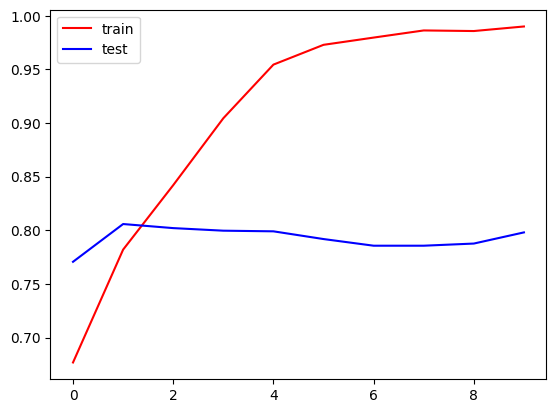

In [16]:
#Accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color='blue', label = 'test')
plt.legend()
plt.show()

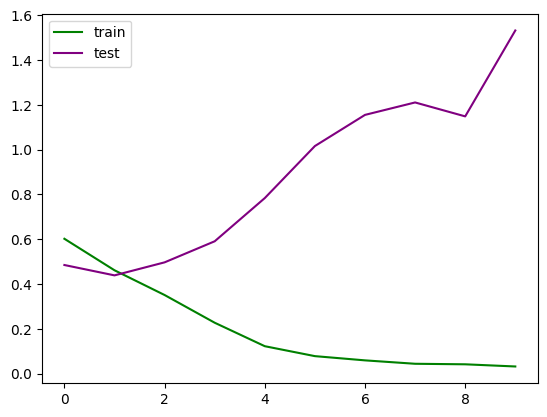

In [17]:
#loss
plt.plot(history.history['loss'],color='green',label='train')
plt.plot(history.history['val_loss'], color = 'purple', label='test')
plt.legend()
plt.show()

We can notice from both the graph that there is a lot of difference between train and test. This means that, overfitting is happening.